In [1]:
!pip install tensorflow opencv-python matplotlib

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 4.6 MB/s eta 0:00:0000:0100:01m


In [2]:
import tensorflow as tf
import os

In [25]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [11]:
data_dir = 'data'

In [12]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exts list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in exts listdata/sad people/00bf280c82b547af87b7b85b162857b1.webp
Image not in exts listdata/sad people/CC_HE_1221887081_SituationalDepression.jpg
Image not in exts listdata/sad people/.DS_Store
Image not in exts listdata/sad people/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in exts listdata/sad people/depositphotos_217564870-stock-photo-young-attractive-sad-black-african.jpg
Image not in exts listdata/sad people/sad-people-love-the-rain.jpg.webp
Image not in exts listdata/sad people/man-with-head-down.jpg
Image not in exts listdata/sad people/sad-young-woman-feeling-stressed-footage-107160392_iconl.webp
Image not in exts listdata/happy people/.DS_Store
Image not in exts listdata/happy people/traitshappypeople.webp
Image not in exts listdata/happy people/Happy People.jpg
Image not in exts listdata/happy people/how-to-watch-shiny-happy-people-64a2f8ea7dc3014582658-300.webp


In [16]:
tf.data.Dataset??

In [17]:
import numpy as np

In [38]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 159 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [28]:
batch = data_iterator.next()

In [29]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [30]:
#Labels
#Class 1 = Sad People
#Class 0 = Happy People
batch[1]

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int32)

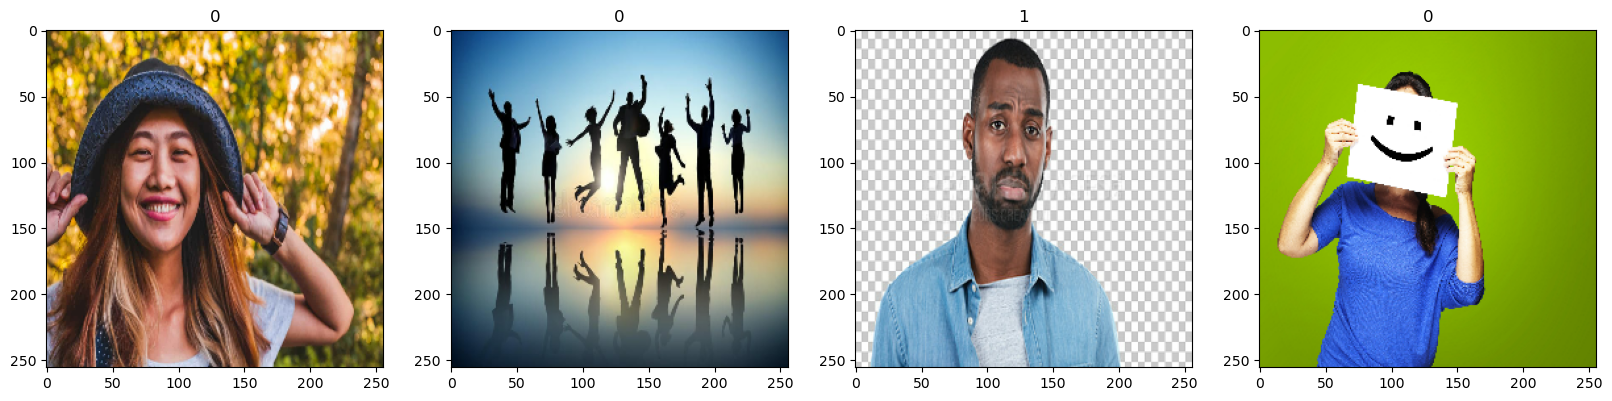

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [39]:
data = data.map(lambda x, y: (x/255, y))

In [40]:
scaled_iterator = data.as_numpy_iterator()

In [41]:
batch = scaled_iterator.next()

In [42]:
batch[0].max()

1.0

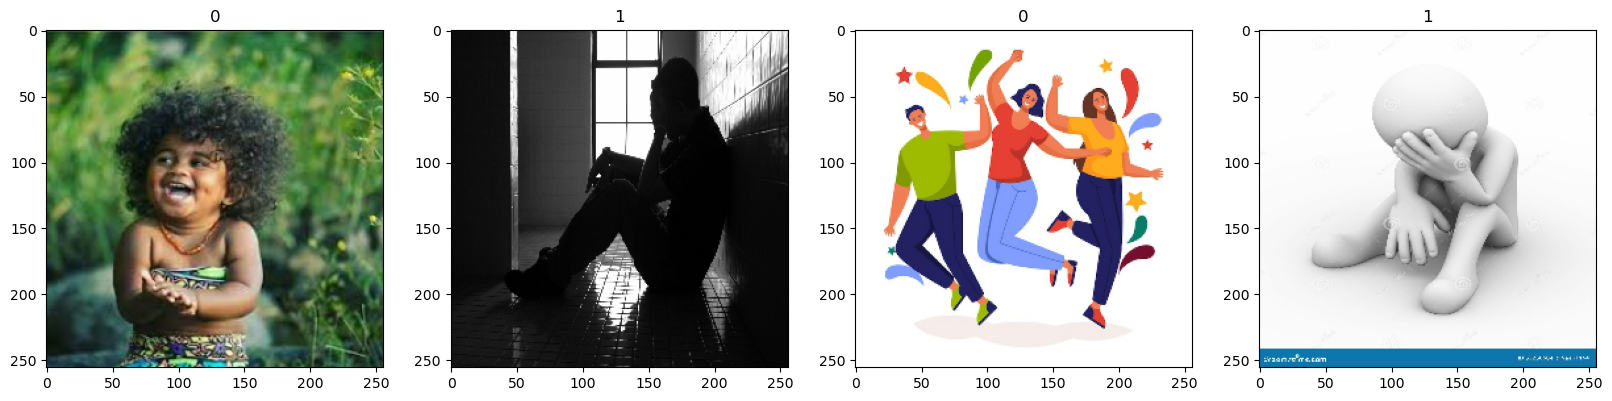

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [44]:
len(data)

5

In [66]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [67]:
train_size

3

In [68]:
val_size

1

In [69]:
test_size

1

In [70]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [75]:
model = Sequential()

In [78]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [79]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [81]:
logdir = 'logs'

In [82]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [83]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 2s 624ms/step - loss: 2.5976 - accuracy: 0.4375 - val_loss: 1.6161 - val_accuracy: 0.3438
Epoch 2/20
3/3 [==============================] - 2s 580ms/step - loss: 1.1324 - accuracy: 0.4896 - val_loss: 0.7202 - val_accuracy: 0.4375
Epoch 3/20
3/3 [==============================] - 2s 642ms/step - loss: 0.6714 - accuracy: 0.5625 - val_loss: 0.6079 - val_accuracy: 0.6562
Epoch 4/20
3/3 [==============================] - 2s 591ms/step - loss: 0.6299 - accuracy: 0.5729 - val_loss: 0.6527 - val_accuracy: 0.5625
Epoch 5/20
3/3 [==============================] - 2s 594ms/step - loss: 0.6331 - accuracy: 0.6042 - val_loss: 0.6757 - val_accuracy: 0.5312
Epoch 6/20
3/3 [==============================] - 2s 581ms/step - loss: 0.6345 - accuracy: 0.6562 - val_loss: 0.5198 - val_accuracy: 0.6562
Epoch 7/20
3/3 [==============================] - 2s 607ms/step - loss: 0.5720 - accuracy: 0.6458 - val_loss: 0.5904 - val_accuracy: 0.5938
Epoch 8/20
3/3 [====

In [84]:
hist.history

{'loss': [2.597623825073242,
  1.132399559020996,
  0.6714218258857727,
  0.6299044489860535,
  0.6331088542938232,
  0.6344588398933411,
  0.5720387101173401,
  0.5518723130226135,
  0.48457324504852295,
  0.4855364263057709,
  0.43491339683532715,
  0.3473469913005829,
  0.3558579981327057,
  0.31510093808174133,
  0.2680304944515228,
  0.2317522168159485,
  0.1852155178785324,
  0.20454855263233185,
  0.15008771419525146,
  0.1274130642414093],
 'accuracy': [0.4375,
  0.4895833432674408,
  0.5625,
  0.5729166865348816,
  0.6041666865348816,
  0.65625,
  0.6458333134651184,
  0.6979166865348816,
  0.8645833134651184,
  0.8229166865348816,
  0.84375,
  0.8958333134651184,
  0.84375,
  0.90625,
  0.9270833134651184,
  0.9479166865348816,
  0.9375,
  0.9270833134651184,
  0.9479166865348816,
  0.9791666865348816],
 'val_loss': [1.6160508394241333,
  0.7202385663986206,
  0.6078835725784302,
  0.652731716632843,
  0.6757477521896362,
  0.519784688949585,
  0.5904418230056763,
  0.5195552

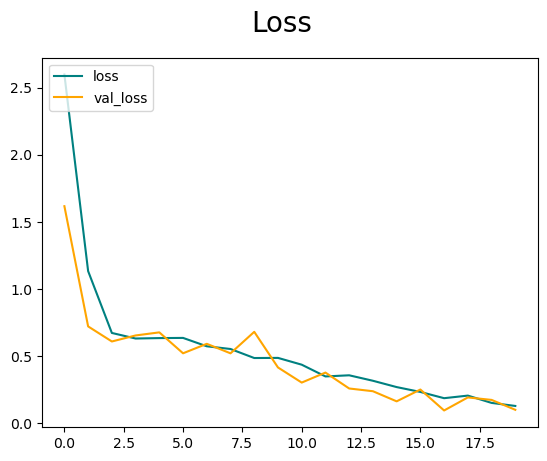

In [86]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

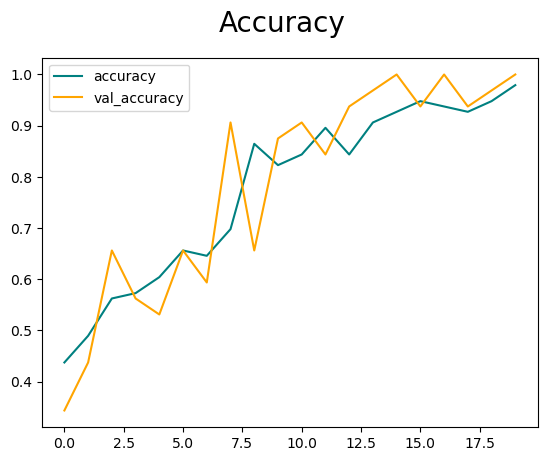

In [89]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [91]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [92]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [93]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 143ms/step


In [94]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


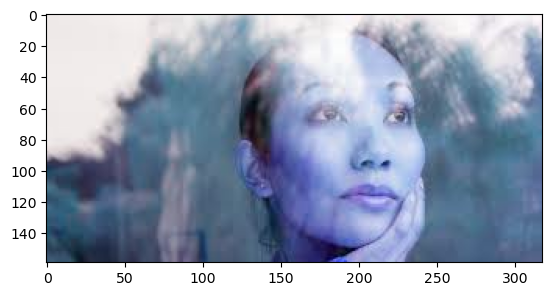

In [110]:
import cv2
img = cv2.imread('sadtest.jpeg')
plt.imshow(img)
plt.show()

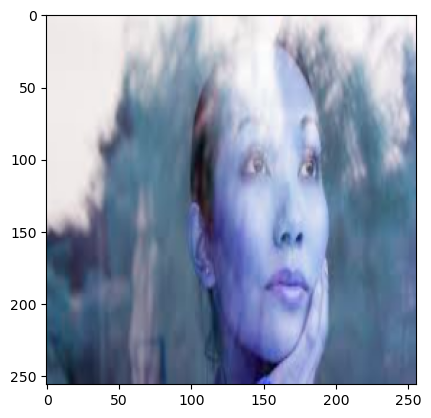

In [111]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [112]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 86ms/step


In [113]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [114]:
yhat

array([[0.74940896]], dtype=float32)

In [115]:
from tensorflow.keras.models import load_model

In [118]:
model.save(os.path.join('models','happysadmodel.h5'))

In [120]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))